In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers.core import Dense
from keras.layers.core import Flatten
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from keras.preprocessing import image as image
from PIL import Image

In [2]:
data_dir='dataset/train'

In [3]:
test_data_dir='dataset/test'

In [4]:
classes=[str(i) for i in range(6)]

In [5]:
val_data_dir='dataset/valid'

In [6]:
train_images_per_class=500

In [7]:
valid_images_per_class=100

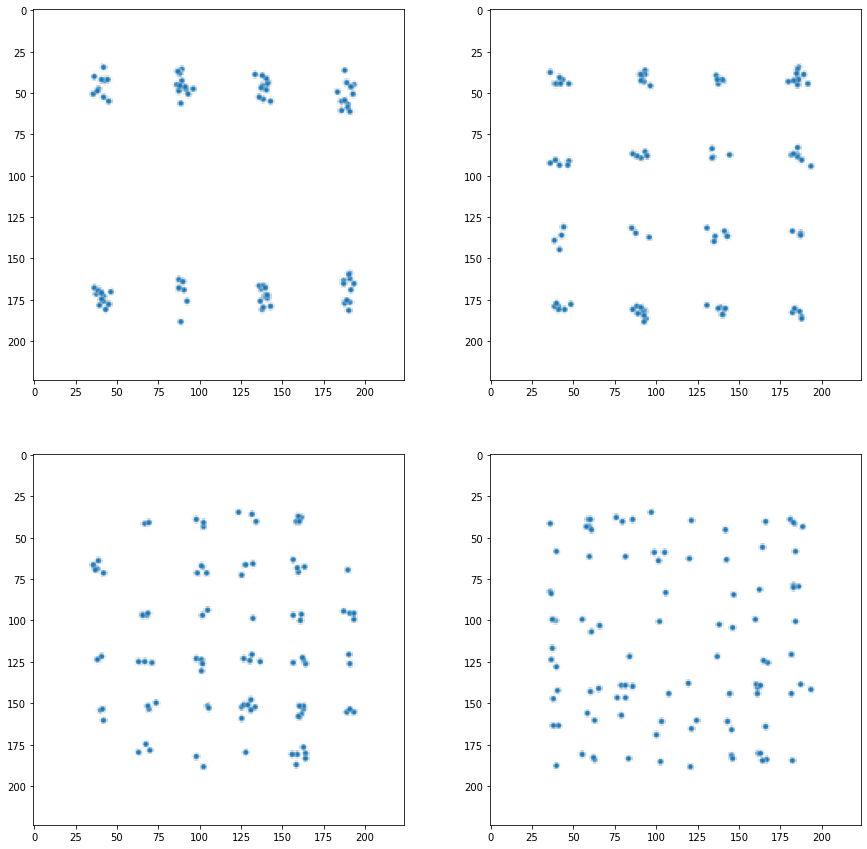

In [8]:
from matplotlib import pyplot as plt
from PIL import Image
 
# Opens a image in RGB mode
newsize=(224,224)

sample_imgs=[400,400,400,400]
imgs=[]
for i in range(2,6):
  imgs.append(Image.open("dataset/train/"+str(i)+'/'+str(sample_imgs[i-2])+".png").resize(newsize))
# create figure
fig = plt.figure(figsize=(15, 15))
  
# setting values to rows and column variables
rows = 2
columns = 2


for i in range(4):
  # Adds a subplot at the ith position
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(imgs[i])

  
# showing image

In [9]:
def preprocess_data(X,Y,n):
  X_p=preprocess_input(X)
  Y_p=tf.keras.utils.to_categorical(Y,n)
  return (X_p,Y_p)

In [11]:
train_data_2=[]
img_height,img_width=224,224
for cls in range(2,6):
  print(cls)
  for i in range(500):
    img_path=data_dir+'/'+str(cls)+'/'+str(i)+'.png'
    img=image.load_img(img_path,target_size=(img_height,img_width))
    img_data=np.asarray(img)
    train_data_2.append(img_data)

2
3
4
5


In [12]:
len(train_data_2)

2000

In [13]:
train_label_2=[]
train_label_2[:2*train_images_per_class]=[0]*2*train_images_per_class
train_label_2[2*train_images_per_class:]=[1]*2*train_images_per_class

In [14]:
train_data_2=np.asarray(train_data_2)
train_label_2=np.asarray(train_label_2)

In [16]:
valid_data_2=[]
img_height,img_width=224,224
for cls in range(2,6):
  print(cls)
  for i in range(100):
    img_path=val_data_dir+'/'+str(cls)+'/'+str(i)+'.png'
    img=image.load_img(img_path,target_size=(img_height,img_width))
    img_data=np.asarray(img)
    valid_data_2.append(img_data)


2
3
4
5


In [17]:
valid_label_2=[]
valid_label_2[:2*valid_images_per_class]=[0]*2*valid_images_per_class
valid_label_2[2*valid_images_per_class:]=[1]*2*valid_images_per_class

In [18]:
valid_data_2=np.asarray(valid_data_2)
valid_label_2=np.asarray(valid_label_2)

In [19]:
print(train_data_2.shape,train_label_2.shape)

(2000, 224, 224, 3) (2000,)


In [20]:
print(valid_data_2.shape,valid_label_2.shape)

(400, 224, 224, 3) (400,)


In [21]:
train_data_2,train_label_2=preprocess_data(train_data_2,train_label_2,2)

In [22]:
valid_data_2,valid_label_2=preprocess_data(valid_data_2,valid_label_2,2)

In [23]:
print(valid_data_2.shape,valid_label_2.shape)

(400, 224, 224, 3) (400, 2)


In [24]:
print(train_data_2.shape,train_label_2.shape)

(2000, 224, 224, 3) (2000, 2)


In [25]:
resnet_model_2 = Sequential()
input_t=tf.keras.Input(shape=(224,224,3))
pretrained_model_2= tf.keras.applications.ResNet50(include_top=False,
                   input_tensor=input_t,
                   pooling='max',classes=2,
                   weights='imagenet')
for layer in pretrained_model_2.layers:
        layer.trainable=False

resnet_model_2.add(pretrained_model_2)

In [26]:
resnet_model_2.add(Flatten())
resnet_model_2.add(Dense(512, activation='relu'))
resnet_model_2.add(Dense(2, activation='softmax'))

In [27]:
resnet_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
_________________________________________________________________


In [28]:
resnet_model_2.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

history_2 = resnet_model_2.fit(train_data_2,train_label_2,validation_data=(valid_data_2,valid_label_2),batch_size=32, epochs=25,verbose=1)

c:\python\python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/25
63/63 [==============================] - 303s 5s/step - loss: 2.9409 - accuracy: 0.6945 - val_loss: 0.3300 - val_accuracy: 0.8300
Epoch 2/25
63/63 [==============================] - 286s 5s/step - loss: 0.4615 - accuracy: 0.7745 - val_loss: 0.2737 - val_accuracy: 0.8625
Epoch 3/25
63/63 [==============================] - 280s 4s/step - loss: 0.4108 - accuracy: 0.7890 - val_loss: 0.3184 - val_accuracy: 0.8325
Epoch 4/25
63/63 [==============================] - 286s 5s/step - loss: 0.3573 - accuracy: 0.8160 - val_loss: 0.2952 - val_accuracy: 0.8325
Epoch 5/25


KeyboardInterrupt: 

In [37]:
test_images_per_class=150

In [38]:
test_data_2=[]
img_height,img_width=224,224
for cls in range(2,6):
  print(cls)
  for i in range(150):
    img_path=test_data_dir+'/'+str(cls)+'/'+str(i)+'.png'
    img=image.load_img(img_path,target_size=(img_height,img_width))
    img_data=np.asarray(img)
    test_data_2.append(img_data)

2
3
4
5


In [39]:
test_label_2=[]
test_label_2[:2*test_images_per_class]=[0]*2*test_images_per_class
test_label_2[2*test_images_per_class:]=[1]*2*test_images_per_class

In [40]:
test_data_2=np.asarray(test_data_2)
test_label_2=np.asarray(test_label_2)

In [41]:
test_data_2,test_label_2=preprocess_data(test_data_2,test_label_2,2)

In [42]:
test_data_2.shape,test_label_2.shape

((600, 224, 224, 3), (600, 2))

In [43]:
test_loss_2,test_acc_2=resnet_model_2.evaluate(test_data_2,test_label_2,verbose=1)

19/19 [==============================] - 71s 4s/step - loss: 0.4196 - accuracy: 0.7533


In [44]:
print('Testing data accuracy = '+str(test_acc_2)+'\n Testing data loss = '+str(test_loss_2))

Testing data accuracy = 0.753333330154419
 Testing data loss = 0.41955602169036865


In [45]:
model_json_2 = resnet_model_2.to_json()
with open("Models/filter_model_3.json", "w") as json_file:
    json_file.write(model_json_2)
# serialize weights to HDF5
resnet_model_2.save_weights("Models/filter_model_3.h5")
print("Saved model to disk")

c:\python\python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Saved model to disk
